In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
 #   for filename in filenames:
  #      print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [48]:
!pip install -U pylibjpeg pylibjpeg-openjpeg pylibjpeg-libjpeg pydicom python-gdcm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 18.5 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 55.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 60.3 MB/s eta 0:00:0000:0100:01


In [11]:
# Exploring dataset
import pandas as pd

dataset_path="/kaggle/input/rsna-breast-cancer-detection"
train_df_path=dataset_path+"/train.csv"
test_df_path=dataset_path+"/test.csv"

train_df = pd. read_csv (train_df_path)
test_df = pd. read_csv (test_df_path)

In [12]:
print (f"Total train dataset: {len(train_df)}")
train_df.head()

Total train dataset: 54706


,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [13]:
print (f"Total test dataset: {len(test_df)}")
test_df.head()

Total test dataset: 4


,site_id,patient_id,image_id,laterality,view,age,implant,machine_id,prediction_id
0,2,10008,736471439,L,MLO,81,0,21,10008_L
1,2,10008,1591370361,L,CC,81,0,21,10008_L
2,2,10008,68070693,R,MLO,81,0,21,10008_R
3,2,10008,361203119,R,CC,81,0,21,10008_R


In [15]:
import glob
train_images= glob.glob(dataset_path+"/train_images/*/*")

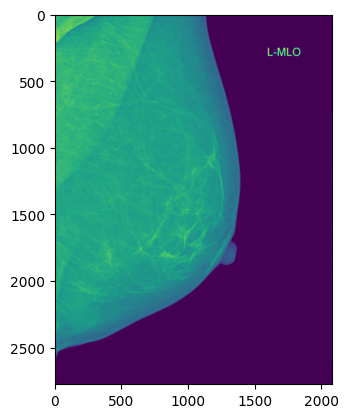

In [28]:
import pydicom
from PIL import Image
import matplotlib.pyplot as plt

def process_dcm(path:str):
    ds = pydicom.dcmread(path)
    image = ds.pixel_array
    pil_image = Image.fromarray(image)
    plt.imshow(pil_image)
process_dcm (train_images[0])

[[3556 3556 3556 ... 3556 3556 3556]
 [3556 3556 3556 ... 3556 3556 3556]
 [3556 3556 3556 ... 3556 3556 3556]
 ...
 [3556 3556 3556 ... 3556 3556 3556]
 [3556 3556 3556 ... 3556 3556 3556]
 [3556 3556 3556 ... 3556 3556 3556]]


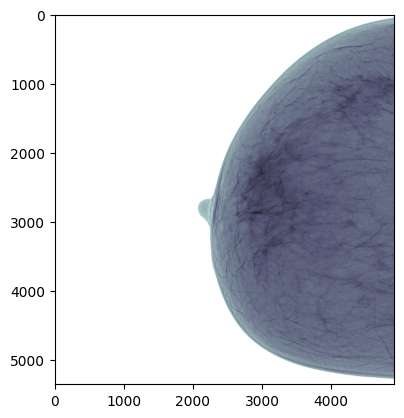

In [41]:
import pydicom
from PIL import Image
import matplotlib.pyplot as plt

def process_dcm(path:str):
    ds = pydicom.dcmread(path)
    image = ds.pixel_array
    pil_image = Image.fromarray(image)
    plt. imshow(pil_image, cmap=plt.cm.bone)
    print(image)
    
process_dcm(train_images[5])

(2776, 2082)


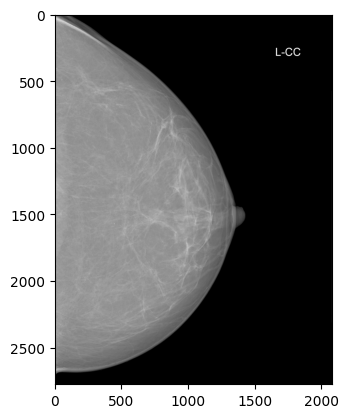

In [46]:
import pydicom
from PIL import Image
import matplotlib.pyplot as plt

def process_dcm(path:str):
    ds = pydicom.dcmread(path)
    image = ds.pixel_array
    pil_image = Image.fromarray(image)
    plt. imshow(pil_image,cmap = 'gray')
    print(image.shape)
    
process_dcm(train_images[3])